# Data Quality Assessment
In diesem Dokument werden die Daten aus dem erhaltenen Extrakt veranschaulicht und analysiert. Dabei liegt das Augenmerk auf folgende Kriterien:
1. Format der erhaltenen Daten
1. Unsere Interpretation der Daten
1. Umfang der Daten
    * Dublikate
    * Null Werte
    * Umfang ohne Dublikate und Null Werte
    * Verteilung von Anfragen auf Antworten
1. Beispiele von guten / schlechten Nachrichten

In [1]:
import warnings
warnings.filterwarnings('ignore')

### 1. Format der erhaltenen Daten
Die Daten _chatbot_extract-1.csv_ wurden in einem CSV-Format geliefert. Dieses Format eignet sich  gut, da sie sehr leicht mithilfe von pandas eingelesen werden kann.

In [2]:
import pandas as pd

extract = '../01_data/chatbot_all_tickets.csv'
names=['ticket', 'customer', 'inquiry', 'state', 'answer']

corpus = pd.read_csv(extract, sep=';', encoding='utf-8', names=names, skiprows=[0], usecols=[2, 3, 4, 5, 6])
corpus.head()

,ticket,customer,inquiry,state,answer
0,Fehler in der App,SVBA,Ich kann die Bilder in übungen nicht Bearbeit...,closed_waiting_for_reply,Coupon einlösen Produkte nicht vorhanden
1,Fehler in der App,hep,Ich wollte das Lehrmittel aktualisieren jedoc...,new,Mac: Access Denied -> Cookies Virenscanner
2,Anmeldung / Aktivierung,hep,Ich habe ein Problem bei der Anmeldung denn ma...,new,Mac: Access Denied -> Cookies Virenscanner
3,Anmeldung / Aktivierung,VELEDES,Musste mich neu anmelden und nun steht bei ABK...,new,Mac: Access Denied -> Cookies Virenscanner
4,Geräteanzahl überschritten,VELEDES,Ich habe es noch nicht heruntergeladen aber es...,new,Mac: Access Denied -> Cookies Virenscanner


### 2. Unsere Interpretation der Daten
| Art      | Beschreibung                                                                                         |
|----------|------------------------------------------------------------------------------------------------------|
| ticket   | Das ist die Kategorie welcher vom Ersteller des Tickets aus einer Dropdown Box gewählt wird.         |
| customer | Das Unternehmen des Kunden.                                                                          |
| inquiry  | Das ist die Support Anfrage die gestellt wird.                                                       |
| state    | Beschreibt den aktuellen Zustand des Tickets.                                                        |
| answer   | Anhand dieser Antwort Kategorie wird die korrekte Anleitung gewählt werden, welche das Problem löst. |

### 3. Umfang der Daten
Das Extrakt enthält _81 Support Anfragen_. Diese werden nun auf folgende Punkte untersucht:
* Dublikate
* Null Werte
* Umfang ohne Dublikate und Null Werte
* Verteilung von Anfragen auf Antworten

In [3]:
corpus.describe()

,ticket,customer,inquiry,state,answer
count,2938,2934,2938,2932,2931
unique,9,31,2793,33,28
top,Fehler in der App,hep,Falls Sie ein Problem mit der Anmeldung oder d...,closed successful,Mac: Access Denied -> Cookies Virenscanner
freq,1237,754,33,1804,1560


#### Dublikate
Das Extrakt enthält _146 Dublikate_ Einträge

In [4]:
import numpy as np

corpus['inquiry'] = corpus['inquiry'].str.lower()
dublicates = np.sum(corpus.duplicated(subset='inquiry'))
print(f'count: {dublicates}')

corpus[corpus.duplicated(subset='inquiry')][:5]

count: 146


,ticket,customer,inquiry,state,answer
15,Geräteanzahl überschritten,BEOOK,offenbar habe ich die geräteanzahl überschrit...,closed successful,Anmeldung - Hinweise für Aktivierung
21,Fehler in der App,SVBA,ich habe einen anzeige fehler bei mehreren büc...,closed successful,Coupon einlösen Produkte nicht vorhanden
133,Fehler in der App,VELEDES,bei so ziemlich jedem der neuen tablets wird r...,closed_waiting_for_reply,Mac: Access Denied -> Cookies Virenscanner
229,Anmeldung / Aktivierung,hep,guten tag,closed successful,Mac: Access Denied -> Cookies Virenscanner
284,Anmeldung / Aktivierung,SVBA,auf einmal waren alle meine lizenzen abgelaufe...,closed successful,Coupon einlösen Produkte nicht vorhanden


#### Null Werte
Im Extrakt befindet sich keine Zeile mit einem Null Wert bei der Support Anfrage.

In [5]:
corpus[corpus.inquiry.isnull()]

,ticket,customer,inquiry,state,answer


#### Umfang ohne Dublikate und Null Werte 

In [6]:
corpus.drop_duplicates(subset='inquiry', keep='first', inplace=True)
corpus.dropna(axis='rows', how='any', inplace=True)

In [7]:
corpus.describe()

,ticket,customer,inquiry,state,answer
count,2782,2782,2782,2782,2782
unique,8,31,2782,32,28
top,Fehler in der App,hep,keine fehler festgestellt.,closed successful,Mac: Access Denied -> Cookies Virenscanner
freq,1175,698,1,1698,1471


#### Verteilung von Anfragen auf Antworten
Die Verteilung ist nicht Gleichmässig. Mit dieser Verteilung können nur folgende Antwort Kategorien verwendet werden:
* Mac: Access Denied -> Cookies, Virenscanner
* Coupon einlösen, Produkte nicht vorhanden
* Anmeldung - Hinweise für Aktivierung
* Linux

Für die beiden Antwort Kategorien **Floating Lizenz, Geräte entfernt, Konfiguration** und **Abmelden, neu anmelden** sind prozentual zu wenig Daten im Vergleich der obigen aufgelisteten Antwort Kategorien vorhanden.

In [9]:
all_answers = list(set(corpus.answer))
all_answers.sort()
for i, v in enumerate(all_answers):
    print(f'[{i}]\t{v}')

[0]	 
[1]	 angezeigt.\n\nFreundliche Grüsse 
[2]	0x00007fff962c0303 TCP Conn 0x123549c30 complete. fd: 158 err: 0\n28.049175 CFNetwork     
[3]	?>\n<html xmlns=\"http://www.w3.org/1999/xhtml\" lang=\"de\" xml:lang=\"de\">\n <head>\n  <meta http-equiv=\"Content-Style-Type\" content=\"text/css\"/>\n  <meta content=\"http://www.w3.org/1999/xhtml; charset=utf-8\" http-equiv=\"Content-Type\"/>\n  <link href=\"http://localhost:7111/bundle/webResources/swissmem-manual.css\" charset=\"UTF-8\" rel=\"stylesheet\" />\n  <script type=\"text/javascript\" src=\"http://localhost:7111/bundle/search/ILPSearchWeb.min.js\"></script>\n  \n  \n  <style>\n  
[4]	Abmelden neu anmelden
[5]	Aktivierungscode falsch
[6]	Anmeldung - Hinweise für Aktivierung
[7]	Anmeldung-HinweisefürAktivierung
[8]	Coupon einlösen Produkte nicht vorhanden
[9]	CouponeinlösenProduktenichtvorhanden
[10]	Dann klicken Sie oben rechts auf Ihren Benutzer Name oder Email mit Symbol.\n5.
[11]	Floating Lizenz Geräte entfernt Konfiguration
[

#### Gefundene Probleme in der Antwort Kategorie
1. ' '
1. ' angezeigt.\\n\\nFreundliche Grüsse '
1. '0x00007fff962c0303 TCP Conn 0x123549c30 complete. fd: 158 err: 0\\n28.049175 CFNetwork     '
1. '<html xmlns=\\"http://www.w3.org/1999/xhtml\\" lang=\\"de\\" xml:lang=\\"de\\">\\n <head>'
1. 'Dann klicken Sie oben rechts auf Ihren Benutzer Name oder Email mit Symbol.\\n5.'
1. 'XhYzhTpnx5 eingegeben.\\n\\nDie Downloads scheinen geklappt zu haben - es leuchtete bei allen der grüne Button.'
1. 'affcfa543fb6\\nGesetzestexte15/2016',
1. 'c7cf3035c31b\\n\\nDeutsch im Abu Ausgabe B',
1. 'closed successful',
1. 'closed_old_app_version',
1. 'closed_waiting_for_reply' 

#### Lösung alle Zeilen mit diesen Antworten dropen

In [10]:
corpus.drop(corpus[
    (corpus.answer == all_answers[0])  | 
    (corpus.answer == all_answers[1])  | 
    (corpus.answer == all_answers[2])  | 
    (corpus.answer == all_answers[3])  | 
    (corpus.answer == all_answers[10])  | 
    (corpus.answer == all_answers[22]) | 
    (corpus.answer == all_answers[23]) | 
    (corpus.answer == all_answers[24]) | 
    (corpus.answer == all_answers[25]) | 
    (corpus.answer == all_answers[26]) | 
    (corpus.answer == all_answers[27])
].index, inplace=True)

In [11]:
all_answers = list(set(corpus.answer))
all_answers.sort()
all_answers

['Abmelden neu anmelden',
 'Aktivierungscode falsch',
 'Anmeldung - Hinweise für Aktivierung',
 'Anmeldung-HinweisefürAktivierung',
 'Coupon einlösen Produkte nicht vorhanden',
 'CouponeinlösenProduktenichtvorhanden',
 'Floating Lizenz Geräte entfernt Konfiguration',
 'FloatingLizenzGeräteentferntKonfiguration',
 'Grafikkarte schwarze Balken',
 'Linux',
 'Linx',
 'Mac: Access Denied -> Cookies',
 'Mac: Access Denied -> Cookies Virenscanner',
 'Mac: Enable Cookies',
 'Mac:AccessDenied->CookiesVirenscanner',
 'Mac:EnableCookies',
 'Mc: Access Denied -> Cookies Virenscnner']

#### Weitere Probleme Antwort Kategorien mit Rechtschreibfehler
- Linux, Linx
- Floating Lizenz Geräte entfernt Konfiguration, FloatingLizenzGeräteentferntKonfiguration
- Mac: Access Denied -> Cookies Virenscanner, Mac:AccessDenied->CookiesVirenscanner, Mac: Access Denied -> Cookies,
Mc: Access Denied -> Cookies Virenscnner
- Mac: Enable Cookies, Mac:EnableCookies
- Anmeldung - Hinweise für Aktivierung, Anmeldung-HinweisefürAktivierung

#### Lösung search & replace

In [13]:
corpus['answer'].replace({
    'Anmeldung-HinweisefürAktivierung': 'Anmeldung - Hinweise für Aktivierung',
    'CouponeinlösenProduktenichtvorhanden': 'Coupon einlösen Produkte nicht vorhanden',
    'FloatingLizenzGeräteentferntKonfiguration': 'Floating Lizenz Geräte entfernt Konfiguration',
    'Linx': 'Linux',
    'Mac:AccessDenied->CookiesVirenscanner': 'Mac: Access Denied -> Cookies Virenscanner',
    'Mac:AccessDenied->CookiesVirenscanner': 'Mac: Access Denied -> Cookies Virenscanner',
    'Mac: Access Denied -> Cookies': 'Mac: Access Denied -> Cookies Virenscanner',
    'Mc: Access Denied -> Cookies Virenscnner': 'Mac: Access Denied -> Cookies Virenscanner',
    'Mac:EnableCookies': 'Mac: Enable Cookies'
}, inplace=True)

In [14]:
all_answers = list(set(corpus.answer))
all_answers.sort()
all_answers

['Abmelden neu anmelden',
 'Aktivierungscode falsch',
 'Anmeldung - Hinweise für Aktivierung',
 'Coupon einlösen Produkte nicht vorhanden',
 'Floating Lizenz Geräte entfernt Konfiguration',
 'Grafikkarte schwarze Balken',
 'Linux',
 'Mac: Access Denied -> Cookies Virenscanner',
 'Mac: Enable Cookies']

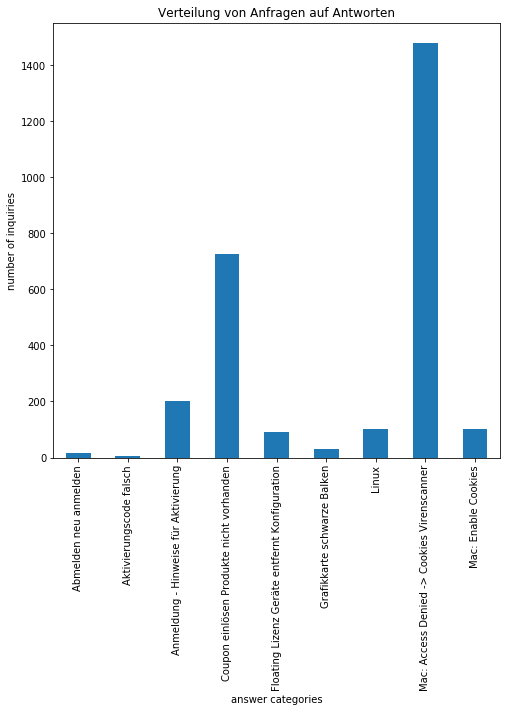

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
corpus.groupby('answer').inquiry.count().plot.bar(ylim=0)
plt.title('Verteilung von Anfragen auf Antworten')
plt.xlabel('answer categories')
plt.ylabel('number of inquiries')
plt.show()

### 4. Beispiele von guten / schlechten Nachrichten
Bei der Analyse der Daten haben wir gute und schlechte Support Anfragen gesehen. Nun zeigen wir welche Nachrichten sich anhand der _Wort Menge_ gut für NLP eignen und welche nicht.

Beispiele für **schlechte** Nachrichten:

In [18]:
bad_examples = []
bad_examples.append(corpus.iloc[26, 2])
bad_examples.append(corpus.iloc[39, 2])
bad_examples.append(corpus.iloc[61, 2])

for i in range(len(bad_examples)):
    print('Bsp.', i, '\t', bad_examples[i], '\n')

Bsp. 0 	 ich wollte heute das beook auf meinem laptop aktuallisieren. trotz löschen des alten programms und erneutem download kann ich die neuste version nicht auf meinem laptop laden. auf dem pc für die schulung der lernenden funktioniert es einwandfrei. als fehlermeldung wird \"gerätezahl überschritten\" angegeben. ich habe aber das beook nur auf dem schulungspc und dem laptop installiert also zwei geräte. den laptop benötige ich für eine weiterbildung am 16. märz in bern. wo liegt mein fehler?? freundliche grüsse balz wyss  

Bsp. 1 	   voucher kann nicht aktiviert werden  

Bsp. 2 	  mir und vielen anderen schüler meiner klasse haben schon mehrmals erlebt dass durch das farbige markieren bei beook die ganze seite plötzlich gelb wurde. das ist überaus mühsam ich bitte sie das zu ändern. freundliche grüsse  



Beispiele für **gute** Nachrichten:

In [19]:
word = 5
mask = (corpus['inquiry'].str.len() > 50 * word)
good_inquiries = corpus.loc[mask].inquiry

for i, msg in enumerate(good_inquiries[:5]):
    print('Bsp.', i, '\t', msg, '\n')

Bsp. 0 	  ich wollte das lehrmittel aktualisieren jedoch geht dies nicht. es kommt dann gleich eine fehlermeldung beim aktualisieren des ersten hefts \"ein haus entsteht\". zur zeit kann ich gar nichts mehr öffnen. können sie das problem bitte so schnell wie möglich beheben da ich die unterlagen in der schule und zum lernen benötige. vielen dank. freundliche grüsse  

Bsp. 1 	 ich habe meinen laptop neu aufgesetzt und nun die swissmem-app wieder installiert. alle meine bücher sind wieder vorhanden aber beim prüfungsbuch metall 30. auflage wird mir kein richtiges deckblatt angezeigt nur ein weisses mit dem swissmem-logo drauf. bei der 29. auflage wird alles richgig angezeigt. woran liegt das?  

Bsp. 2 	  ich kann in meinem beook keine lehrmittel ehr besichtigen. bei meinen mitschühlern funktiorniert es ausser bei dario auch nicht. so mit kann ich mich nicht mehr informieren und nicht vollständig in der klasse mitarbeiten habe auch keinen aktivierungscood enthalten was muss und kann ich